<a href="https://colab.research.google.com/github/peaysararn/ML/blob/main/Stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

In [192]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [234]:
#เลือกข้อมูลหุ้น TSLA
data = yf.Ticker('TSLA')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = data.history(interval=interval,start=start,end=end)
df = df.loc[:,['Open','High','Low','Close']]
df.head()

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,118.470001,118.800003,110.350700,111.059998
2023-01-03 10:30:00-05:00,111.050003,112.239998,108.050003,108.470100
2023-01-03 11:30:00-05:00,108.472397,108.495003,105.599998,106.150002
2023-01-03 12:30:00-05:00,106.148804,106.475998,104.639999,105.669998
2023-01-03 13:30:00-05:00,105.669998,107.449997,105.340103,107.320000


In [235]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod=10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,111.087997,111.449997,110.099998,110.119904,111.239260,-0.609941,46.718536,0.002998,1.107994
2023-01-05 14:30:00-05:00,110.110001,111.329903,109.970001,110.590103,111.023511,-0.572622,48.736136,-0.009903,-0.977997
2023-01-05 15:30:00-05:00,110.602798,110.860001,110.059998,110.370003,110.784511,-0.487242,47.794819,0.012695,0.492798
2023-01-06 09:30:00-05:00,103.625000,107.550003,101.809998,105.800003,110.162011,0.159000,33.062448,-6.745003,-6.977798
2023-01-06 10:30:00-05:00,105.790001,109.800003,105.599998,109.699997,109.831010,0.394251,48.201920,-0.010002,2.165001


In [236]:
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
X.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,111.087997,111.449997,110.099998,110.119904,111.239260,-0.609941,46.718536,0.002998,1.107994
2023-01-05 14:30:00-05:00,110.110001,111.329903,109.970001,110.590103,111.023511,-0.572622,48.736136,-0.009903,-0.977997
2023-01-05 15:30:00-05:00,110.602798,110.860001,110.059998,110.370003,110.784511,-0.487242,47.794819,0.012695,0.492798
2023-01-06 09:30:00-05:00,103.625000,107.550003,101.809998,105.800003,110.162011,0.159000,33.062448,-6.745003,-6.977798
2023-01-06 10:30:00-05:00,105.790001,109.800003,105.599998,109.699997,109.831010,0.394251,48.201920,-0.010002,2.165001


In [237]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [238]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.027526093964223668]
1,High,[-0.010180312528630041]
2,Low,[0.06623288159425686]
3,Close,[-0.045220674691212756]
4,S_10,[0.01650359164039487]
5,Corr,[-0.004966252408494966]
6,RSI,[0.006007950468118752]
7,Open-Close,[0.013073718400816314]
8,Open-Open,[-0.010648977334172518]


In [239]:
# Specify the date for prediction
prediction_date = '2023-12-1'
probability = model.predict_proba(X_test)
print(probability)

[[0.42966608 0.57033392]
 [0.42960892 0.57039108]
 [0.43225926 0.56774074]
 ...
 [0.46603199 0.53396801]
 [0.4633934  0.5366066 ]
 [0.48342239 0.51657761]]


In [240]:
predicted = model.predict(X_test)
predicted

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1

In [241]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 21 247]
 [ 22 228]]
              precision    recall  f1-score   support

          -1       0.49      0.08      0.14       268
           1       0.48      0.91      0.63       250

    accuracy                           0.48       518
   macro avg       0.48      0.50      0.38       518
weighted avg       0.48      0.48      0.37       518



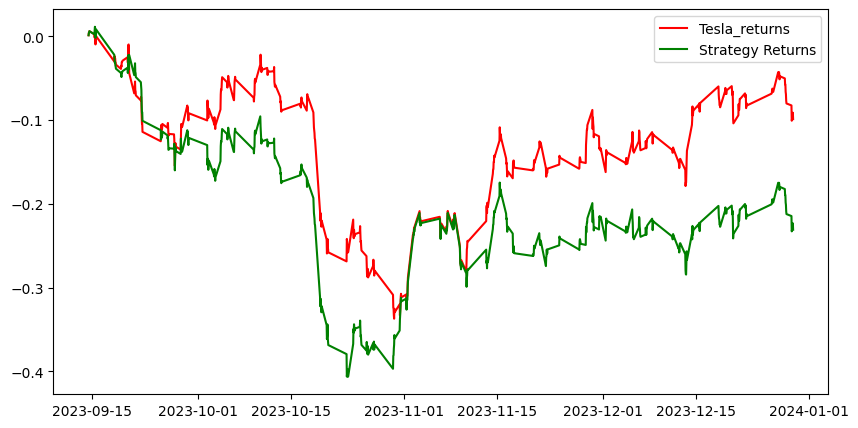

In [242]:
df['Predicted_Signal'] = model.predict(X)
df['Tesla_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Tesla_returns = np.cumsum(df[split:]['Tesla_returns'])

df['Startegy_returns'] = df['Tesla_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Tesla_returns, color='r',label = 'Tesla_returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [265]:
#เลือกข้อมูลหุ้น CVX เพิ่ม
data2 = yf.Ticker('CVX')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df2 = data2.history(interval=interval,start=start,end=end)
df2 = df2.loc[:,['Open','High','Low','Close']]
df2['CVX_Y'] = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)
df2.head()

,Open,High,Low,Close,CVX_Y
Datetime,,,,,
2023-01-03 09:30:00-05:00,178.039993,179.000000,177.089996,177.369995,-1
2023-01-03 10:30:00-05:00,177.350006,178.259903,176.630005,176.865005,-1
2023-01-03 11:30:00-05:00,176.860001,176.860001,175.169998,175.389999,-1
2023-01-03 12:30:00-05:00,175.410004,175.720001,174.070007,174.100006,-1
2023-01-03 13:30:00-05:00,174.070007,174.389999,172.130005,172.139999,1


In [267]:
#รวมข้อมูล Y ของหุ้น CVX เข้ากับข้อมูลหุ้น TSLA
merged_df = pd.merge(df.iloc[:,:9],df2['CVX_Y'],on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,CVX_Y
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,111.087997,111.449997,110.099998,110.119904,111.239260,-0.609941,46.718536,0.002998,1.107994,-1
2023-01-05 14:30:00-05:00,110.110001,111.329903,109.970001,110.590103,111.023511,-0.572622,48.736136,-0.009903,-0.977997,-1
2023-01-05 15:30:00-05:00,110.602798,110.860001,110.059998,110.370003,110.784511,-0.487242,47.794819,0.012695,0.492798,1
2023-01-06 09:30:00-05:00,103.625000,107.550003,101.809998,105.800003,110.162011,0.159000,33.062448,-6.745003,-6.977798,-1
2023-01-06 10:30:00-05:00,105.790001,109.800003,105.599998,109.699997,109.831010,0.394251,48.201920,-0.010002,2.165001,-1


In [268]:
X2 = merged_df.iloc[:,:10]
y2 = np.where(merged_df['Close'].shift(-1) > merged_df['Close'],1,-1)
X2.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,CVX_Y
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,111.087997,111.449997,110.099998,110.119904,111.239260,-0.609941,46.718536,0.002998,1.107994,-1
2023-01-05 14:30:00-05:00,110.110001,111.329903,109.970001,110.590103,111.023511,-0.572622,48.736136,-0.009903,-0.977997,-1
2023-01-05 15:30:00-05:00,110.602798,110.860001,110.059998,110.370003,110.784511,-0.487242,47.794819,0.012695,0.492798,1
2023-01-06 09:30:00-05:00,103.625000,107.550003,101.809998,105.800003,110.162011,0.159000,33.062448,-6.745003,-6.977798,-1
2023-01-06 10:30:00-05:00,105.790001,109.800003,105.599998,109.699997,109.831010,0.394251,48.201920,-0.010002,2.165001,-1


In [269]:
split2 = int(0.7*len(merged_df))
X_train2, X_test2, y_train2, y_test2 = X2[:split2], X2[split2:], y2[:split2], y2[split2:]

model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit (X_train2,y_train2)
pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open,[-0.008172104692611806]
1,High,[-0.016737881138322027]
2,Low,[0.044345179118271204]
3,Close,[-0.03434268674850146]
4,S_10,[0.014635857609386979]
5,Corr,[-0.026324198296521432]
6,RSI,[0.006039311523446477]
7,Open-Close,[0.01584374059702485]
8,Open-Open,[-0.006311878086306782]
9,CVX_Y,[0.37124326724190926]


In [270]:
# Specify the date for prediction
prediction_date2 = '2023-12-1'
probability2 = model2.predict_proba(X_test2)
print(probability2)

[[0.53368483 0.46631517]
 [0.35119727 0.64880273]
 [0.53361434 0.46638566]
 ...
 [0.38724234 0.61275766]
 [0.56786965 0.43213035]
 [0.57863648 0.42136352]]


In [271]:
predicted2 = model2.predict(X_test2)
predicted2

array([-1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1

In [272]:
print(metrics.confusion_matrix(y_test2, predicted2))
print(metrics.classification_report(y_test2, predicted2))

[[148 120]
 [112 138]]
              precision    recall  f1-score   support

          -1       0.57      0.55      0.56       268
           1       0.53      0.55      0.54       250

    accuracy                           0.55       518
   macro avg       0.55      0.55      0.55       518
weighted avg       0.55      0.55      0.55       518



In [273]:
print('Model Accuracy')
print(f'Model_1 {round(model.score(X_test,y_test)*100,2)} %')
print(f'Model_2 {round(model2.score(X_test2,y_test2)*100,2)} %')

Model Accuracy
Model_1 48.07 %
Model_2 55.21 %


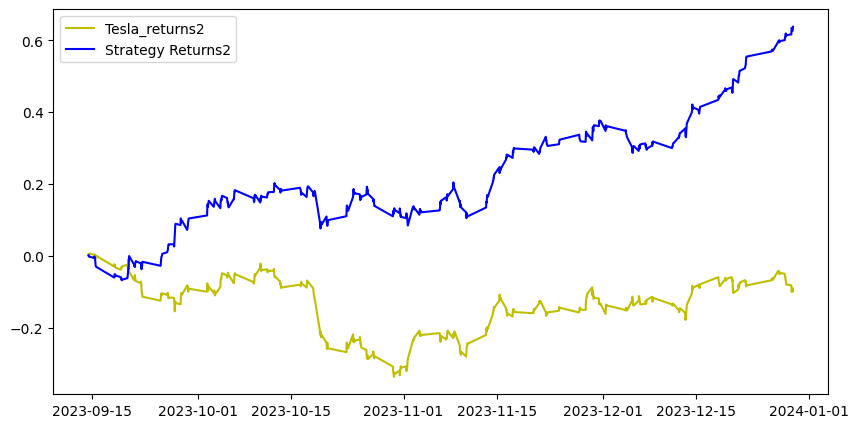

In [274]:
merged_df['Predicted_Signal'] = model2.predict(X2)
merged_df['Tesla_returns'] = np.log(merged_df['Close']/merged_df['Close'].shift(1))
Cumulative_Tesla_CVX_returns2 = np.cumsum(merged_df[split:]['Tesla_returns'])

merged_df['Startegy_returns'] = merged_df['Tesla_returns']* merged_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_CVX_returns2 = np.cumsum(merged_df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Tesla_CVX_returns2, color='y',label = 'Tesla_returns2')
plt.plot(Cumulative_Strategy_CVX_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()

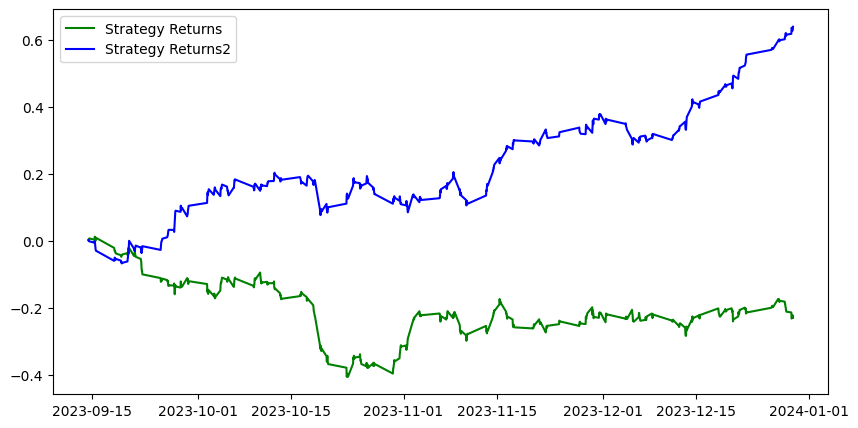

In [275]:
#เปรียบเทียบ Strategy Returns ของ model1, model2
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy_CVX_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()